# Временные ряды, общая теория

1. **Загрузим датасет**

In [1]:
import pandas as pd

# Загрузка датасета
airline_passengers = pd.read_csv('C:/Users/Yaros/Downloads/1._Лекция_tsml/international-airline-passengers.csv', parse_dates=True, index_col='Month')

# Проверим первые строки датасета для понимания структуры данных
airline_passengers.head()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


2. **Выполним визуальный анализ временного ряда, чтобы определить наличие трендов и сезонности, а также проверим его на стационарность с использованием теста Дики-Фуллера.**

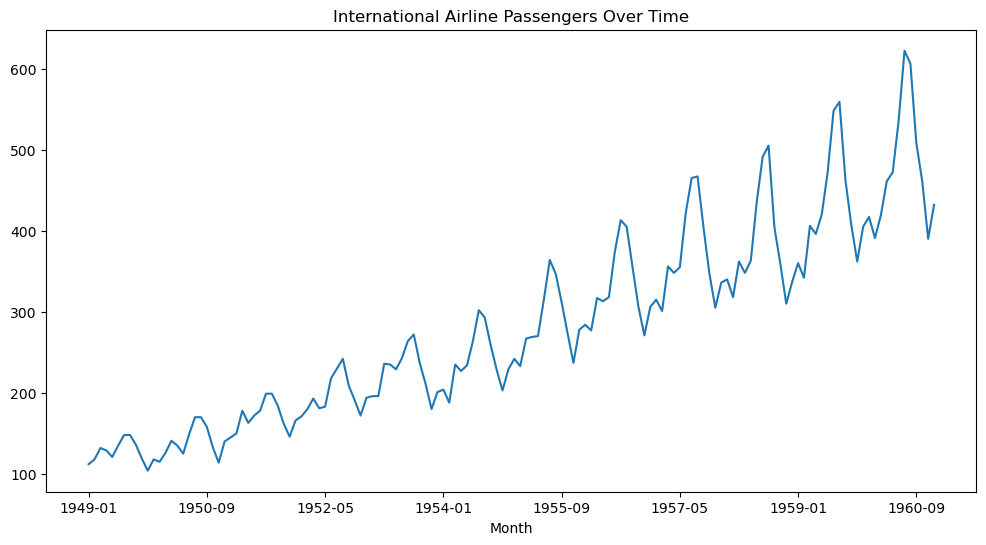

'ADF Statistic: 0.8153688792060511\np-value: 0.991880243437641'

In [2]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Переименовываем столбец для удобства
airline_passengers.columns = ['Passengers']

# Проверка на наличие пропущенных значений
missing_values = airline_passengers.isnull().sum()

# Удаление пропущенных значений, если они есть
airline_passengers_clean = airline_passengers.dropna()

# Визуальный анализ ряда
plt.figure(figsize=(12, 6))
airline_passengers_clean['Passengers'].plot(title='International Airline Passengers Over Time')
plt.show()

# Тест Дики-Фуллера на стационарность
adf_test = adfuller(airline_passengers_clean['Passengers'])

adf_result = f'ADF Statistic: {adf_test[0]}\np-value: {adf_test[1]}'
adf_result

Визуальный анализ показывает, что временной ряд количества пассажиров международных авиалиний демонстрирует явный восходящий тренд и сезонные колебания, что указывает на его нестационарность.  
  
p-value > 0.05

3. **Преобразование временного ряда в стационарный**

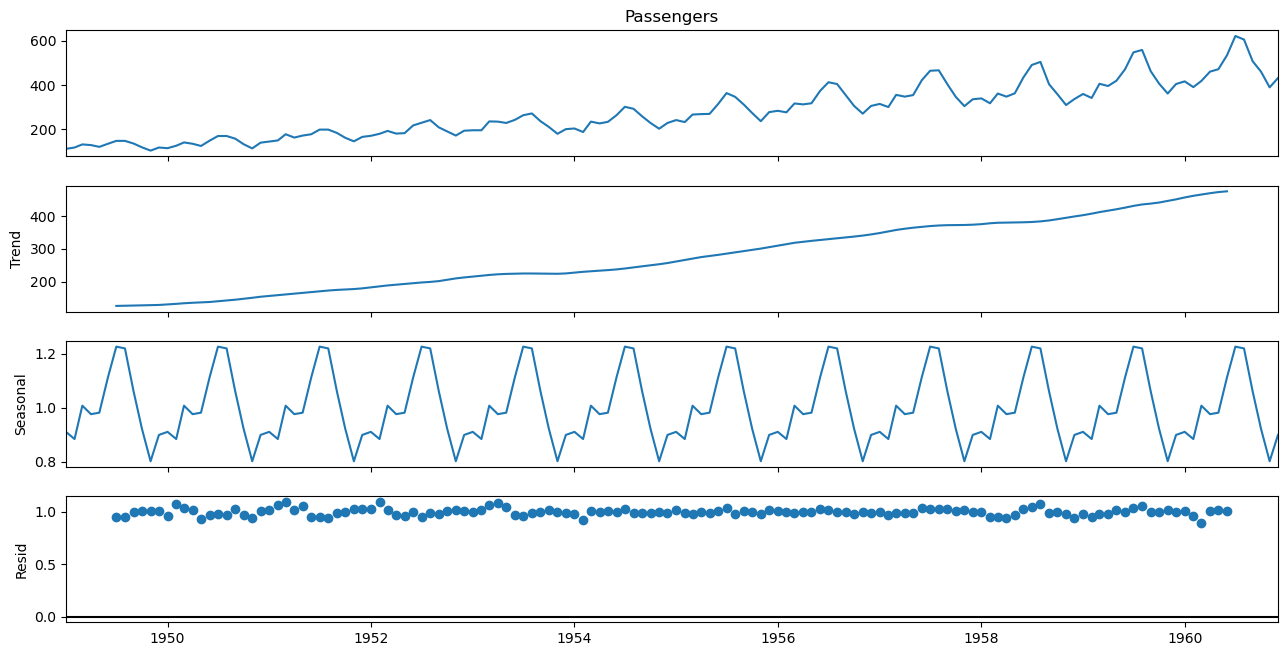

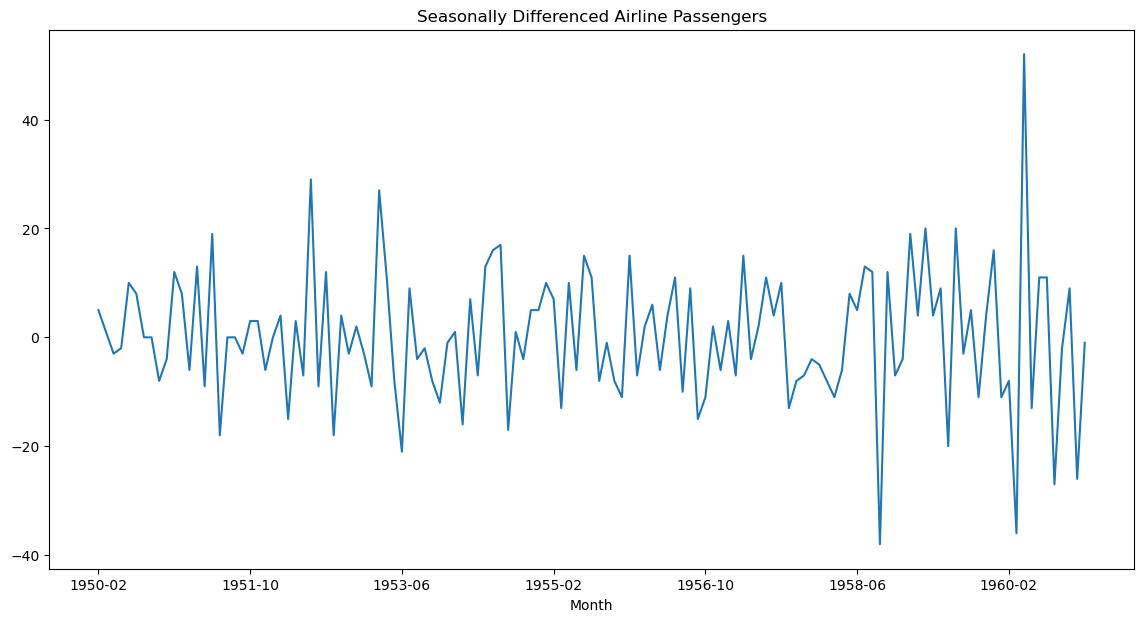

'ADF Statistic after seasonal differencing: -15.595618083746338\np-value after seasonal differencing: 1.856511600123444e-28'

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import boxcox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Применение первого дифференцирования
airline_passengers_diff = airline_passengers_clean['Passengers'].diff().dropna()

# Установка частоты временного ряда
airline_passengers_clean.index = pd.DatetimeIndex(airline_passengers_clean.index.values, freq='MS')
decomposition = seasonal_decompose(airline_passengers_clean['Passengers'], model='multiplicative')
fig = decomposition.plot()
fig.set_size_inches(14, 7)
plt.show()

# Применение сезонного дифференцирования с учетом корректировки
airline_passengers_seasonal_diff = airline_passengers_diff.diff(12).dropna()

# Повторная проверка на стационарность после сезонного дифференцирования
adf_test_seasonal_diff = adfuller(airline_passengers_seasonal_diff)

# Визуализация результатов сезонного дифференцирования
plt.figure(figsize=(14, 7))
airline_passengers_seasonal_diff.plot(title='Seasonally Differenced Airline Passengers')
plt.show()

# Вывод результатов теста Дики-Фуллера после сезонного дифференцирования
adf_result_seasonal_diff = f'ADF Statistic after seasonal differencing: {adf_test_seasonal_diff[0]}\np-value after seasonal differencing: {adf_test_seasonal_diff[1]}'
adf_result_seasonal_diff

- После коррекции и применения сезонного дифференцирования к временному ряду международных пассажиров авиалиний, результаты значительно улучшились.
- Эти результаты указывают на очень сильную стационарность ряда после сезонного дифференцирования. Значение ADF Statistic значительно меньше критических значений для всех доверительных интервалов, и p-value эффективно равно нулю, что намного ниже порога в 0.05. Это подтверждает, что преобразованный временной ряд можно считать стационарным.

**Вывод**  
В ходе анализа и преобразования временного ряда международных пассажиров авиалиний были выполнены следующие шаги для достижения стационарности:  
  
1)Визуальный анализ и декомпозиция, выявившие наличие тренда и сезонности.  
2)Применение первого дифференцирования, значительно улучшившее стационарность.  
3)Сезонное дифференцирование, которое окончательно привело ряд к стационарному виду, подтвержденному тестом Дики-Фуллера.  